In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# read the dataset
pd.set_option('display.max_columns',None)
df = pd.read_csv("C:/Users/User/Downloads/diabetes_prediction_dataset.csv")
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
81088,Male,1.8,0,0,No Info,17.72,4.5,100,0
8281,Female,79.0,0,0,No Info,27.32,5.0,126,0
8468,Female,78.0,0,0,No Info,30.22,5.8,80,0
89487,Female,69.0,1,1,never,22.15,6.6,260,1
81935,Male,80.0,1,0,No Info,27.06,6.0,130,1


# 1. Dive Into Data

In [4]:
from ydata_profiling import ProfileReport
report = ProfileReport(df, title="Profiling Report", explorative=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.shape

(100000, 9)

In [8]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
df.duplicated().sum()

3854

In [11]:
# statistical summary of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [12]:
# summary of categorical column
df.describe(include='object')

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [13]:
df.corr(numeric_only=True)['diabetes']

age                    0.258008
hypertension           0.197823
heart_disease          0.171727
bmi                    0.214357
HbA1c_level            0.400660
blood_glucose_level    0.419558
diabetes               1.000000
Name: diabetes, dtype: float64

# 2. Data Cleaning

In [14]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [15]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [16]:
# removing 'Other' from ['gender'] column
#df.drop(df[df['gender']=='Other'].index,inplace=True)
df = df[df['gender'] != 'Other']
df['gender'].value_counts()

gender
Female    58552
Male      41430
Name: count, dtype: int64

In [17]:
# removing duplicate records
df.drop_duplicates(inplace=True)
print(df.shape)

(96128, 9)


# 3. New Features

In [18]:
# creating 10 years age groups
#bins =[0,10,20,30,40,50,60,70,80]
#abels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
#df['age_group'] = pd.cut(df['age'],bins=bins,labels=labels,right=True)

In [19]:
# creating a new column 'age_stage' based on the age classification
def age_stage(age):
    if age<=1:                    # Infants(0-1)
        return 'Infant'         
    elif age<=12:                 # Children(2-12)
        return 'Child'
    elif age<=19:                 # Teenagers(13-19)
        return 'Teenager'
    elif age<=24:                 # Youths(20-24)
        return 'Youth'
    elif age<=64:                 # Adults(25-64)
        return 'Adult'
    else:                         # Seniors(65 years and over)
        return 'Senior'
df['age_stage'] = df['age'].apply(age_stage)
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_stage
75945,Female,24.0,0,0,never,24.32,6.5,90,0,Youth
69136,Female,59.0,0,0,No Info,27.32,5.0,200,0,Adult
10021,Female,47.0,0,0,former,33.43,4.8,80,0,Adult
35411,Female,20.0,0,0,former,27.32,4.8,145,0,Youth
95445,Female,23.0,0,0,No Info,24.95,6.0,145,0,Youth


# 4. EDA

**UV analysis**

gender
Female    56161
Male      39967
Name: count, dtype: int64
None


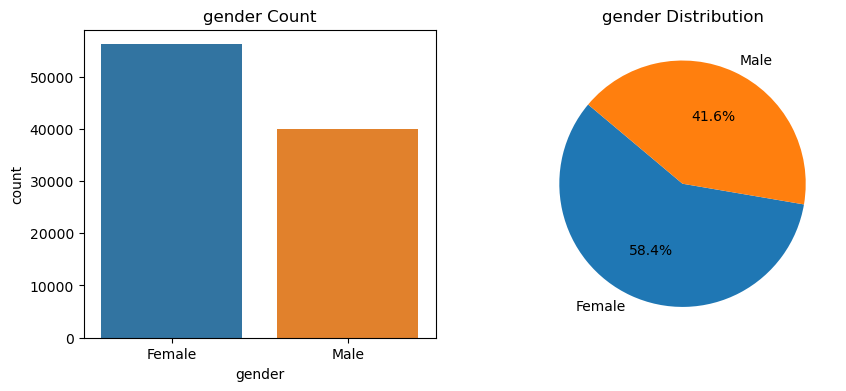

In [20]:
def univariate_analysis(column):
    counts = df[column].value_counts(normalize=True) * 100
    print(df[column].value_counts())
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.countplot(data=df,x=column)
    plt.title(column+' Count')

    plt.subplot(122)
    plt.pie(counts,labels=counts.index,autopct='%1.1f%%',startangle=140)
    plt.title(column+' Distribution')
    
print(univariate_analysis('gender'))

hypertension
0    88667
1     7461
Name: count, dtype: int64
None


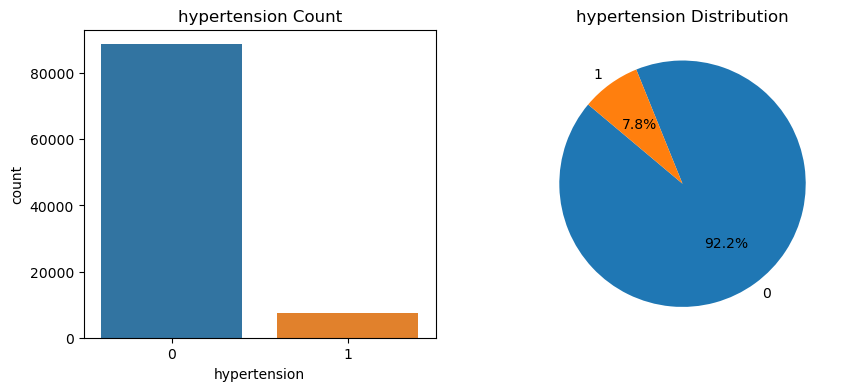

In [21]:
print(univariate_analysis('hypertension'))

heart_disease
0    92205
1     3923
Name: count, dtype: int64
None


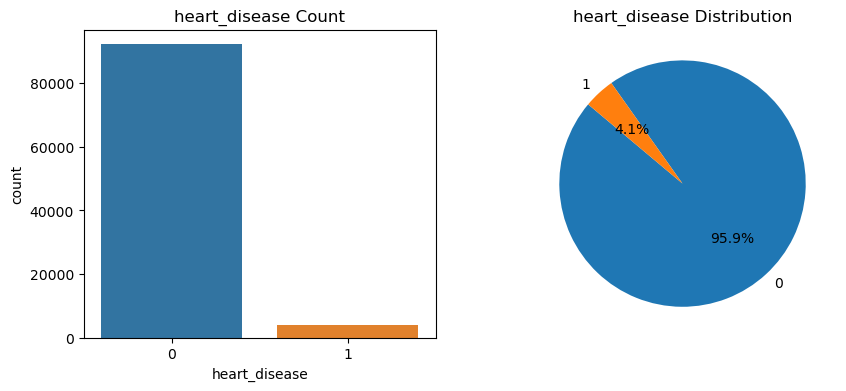

In [22]:
print(univariate_analysis('heart_disease'))

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64
None


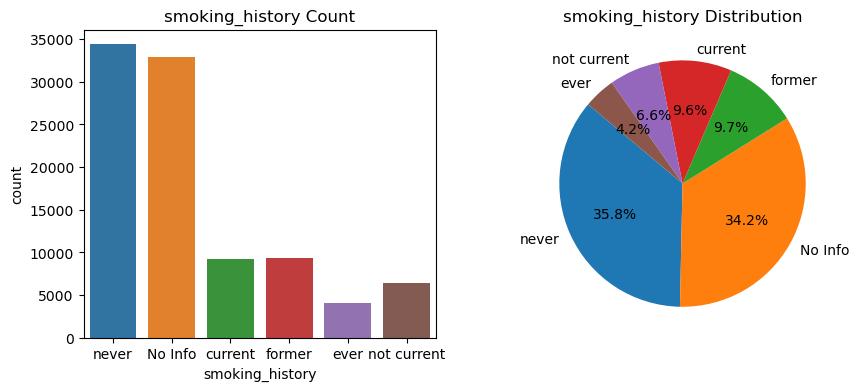

In [23]:
print(univariate_analysis('smoking_history'))

diabetes
0    87646
1     8482
Name: count, dtype: int64
None


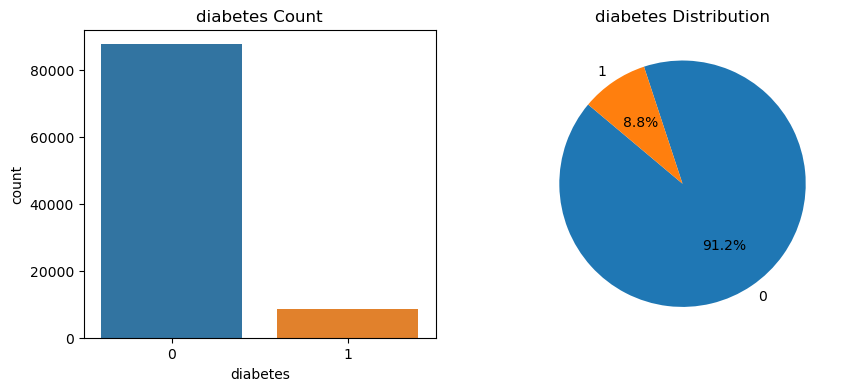

In [24]:
print(univariate_analysis('diabetes'))

age_stage
Adult       53525
Senior      17656
Child       10992
Teenager     7040
Youth        5922
Infant        993
Name: count, dtype: int64
None


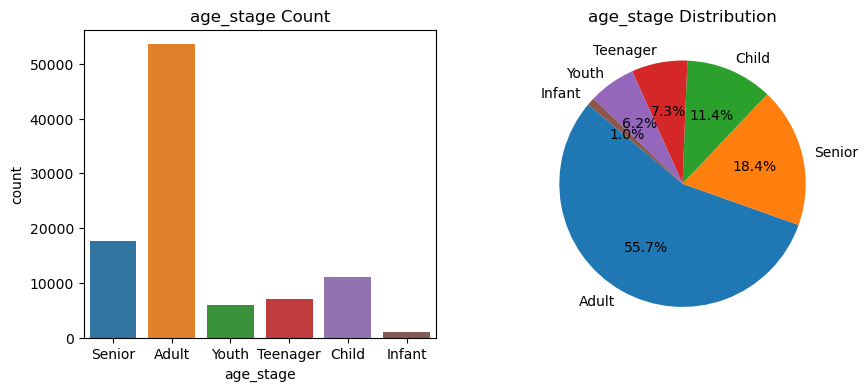

In [21]:
print(univariate_analysis('age_stage'))

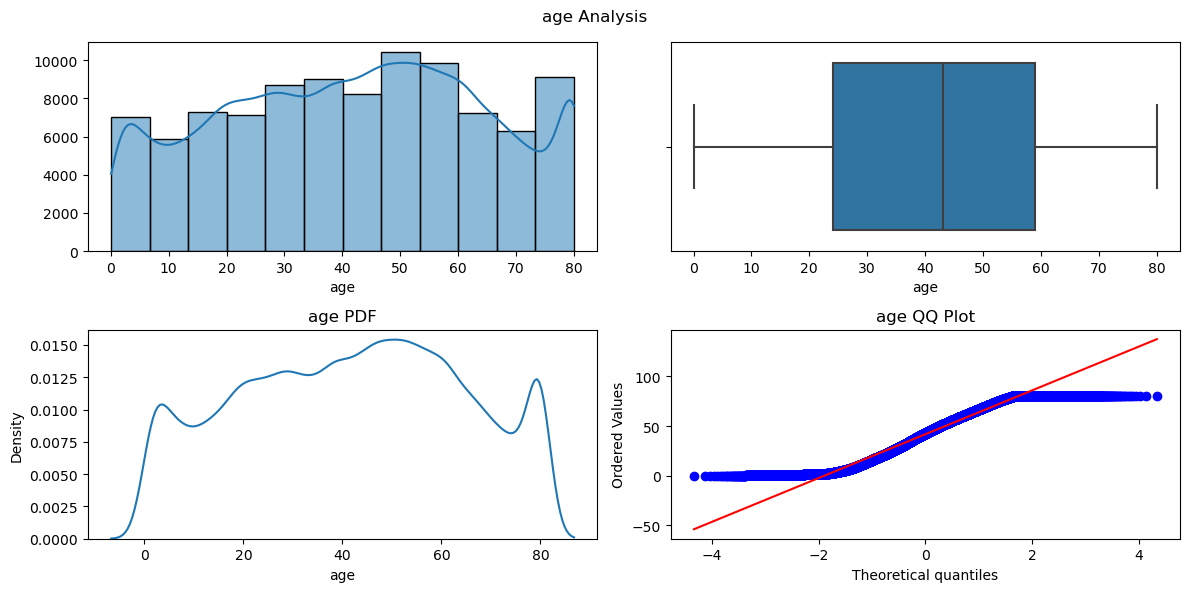

In [26]:
import scipy.stats as stats
def uv_analysis(col):
    plt.figure(figsize=(12,6))

    plt.suptitle(col+' Analysis')
    plt.subplot(221)
    sns.histplot(df[col],kde=True,bins=12)
    plt.ylabel('')

    plt.subplot(222)
    sns.boxplot(x=df[col])

    plt.subplot(223)
    plt.title(col+' PDF')
    sns.distplot(df[col],bins=12,hist=False)

    plt.subplot(224)
    stats.probplot(df[col],dist='norm',plot=plt)
    plt.title(col+' QQ Plot')
    plt.tight_layout()
    return ''
print(uv_analysis('age'))

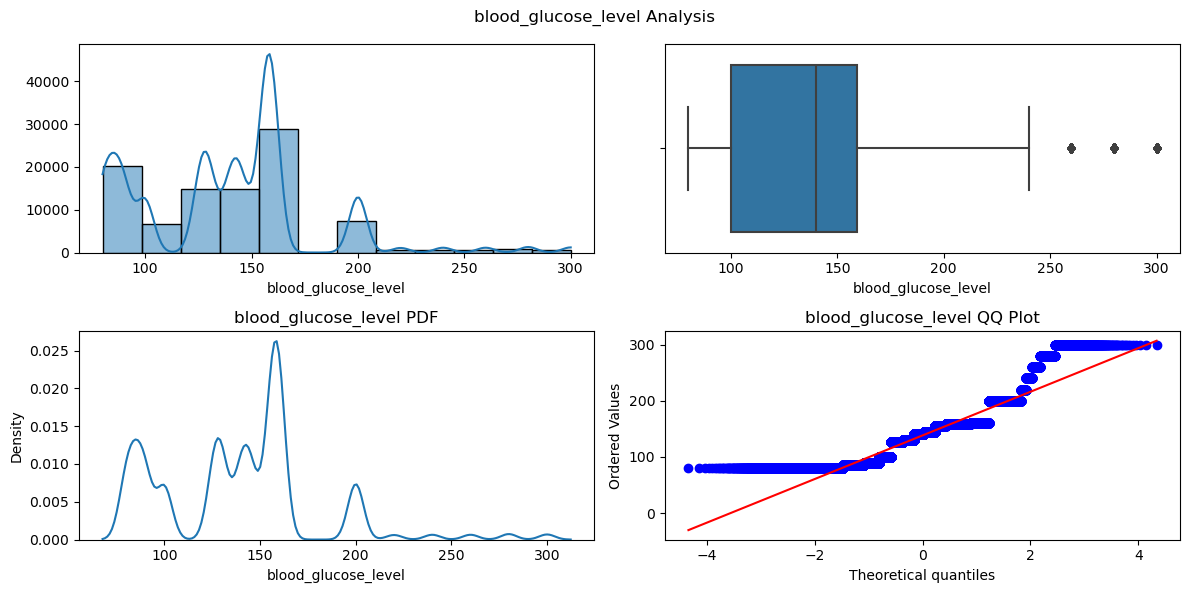

In [27]:
print(uv_analysis('blood_glucose_level'))

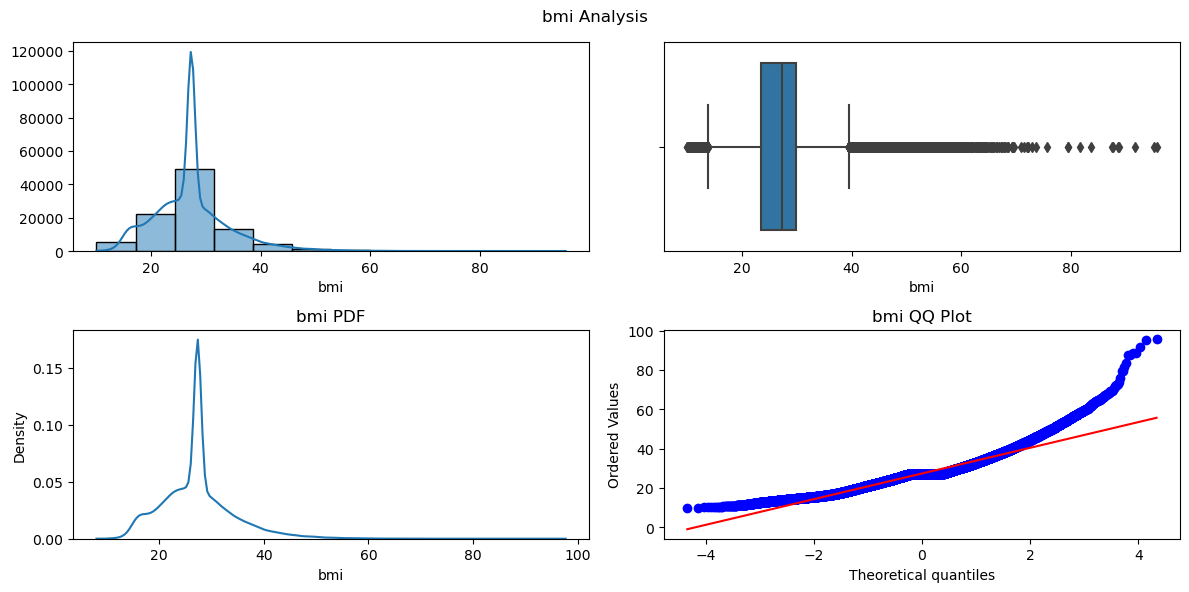

In [28]:
print(uv_analysis('bmi'))

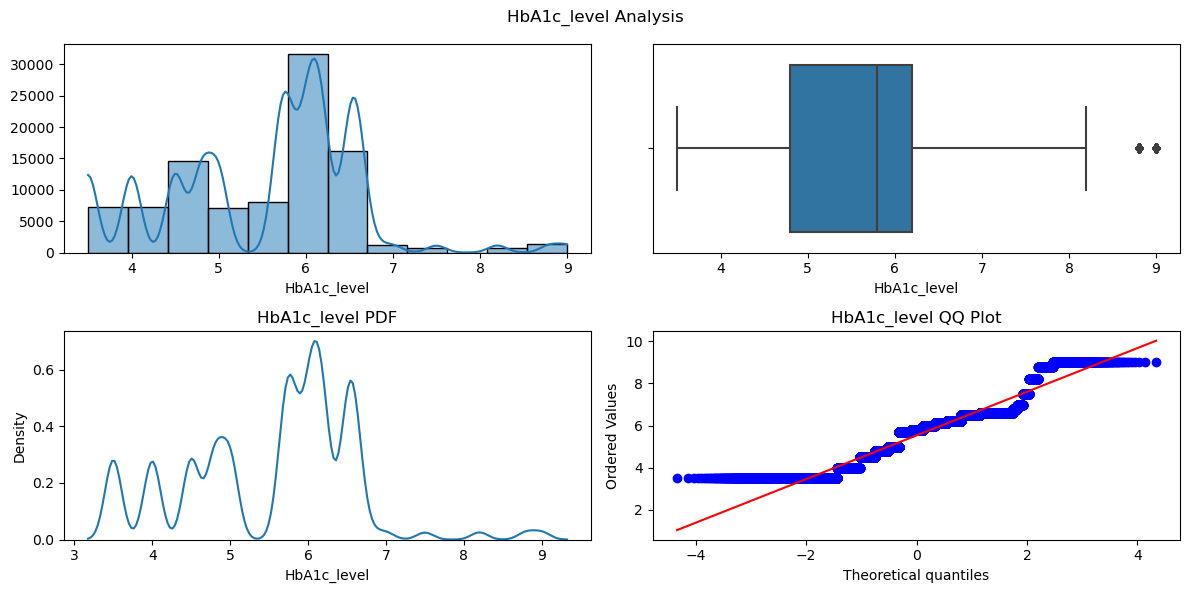

In [29]:
print(uv_analysis('HbA1c_level'))

**BV/MV Analysis**

In [30]:
df.sample(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_stage
44147,Male,65.0,0,0,No Info,22.26,3.5,160,0,Senior
87585,Female,48.0,0,0,never,27.32,4.0,130,0,Adult


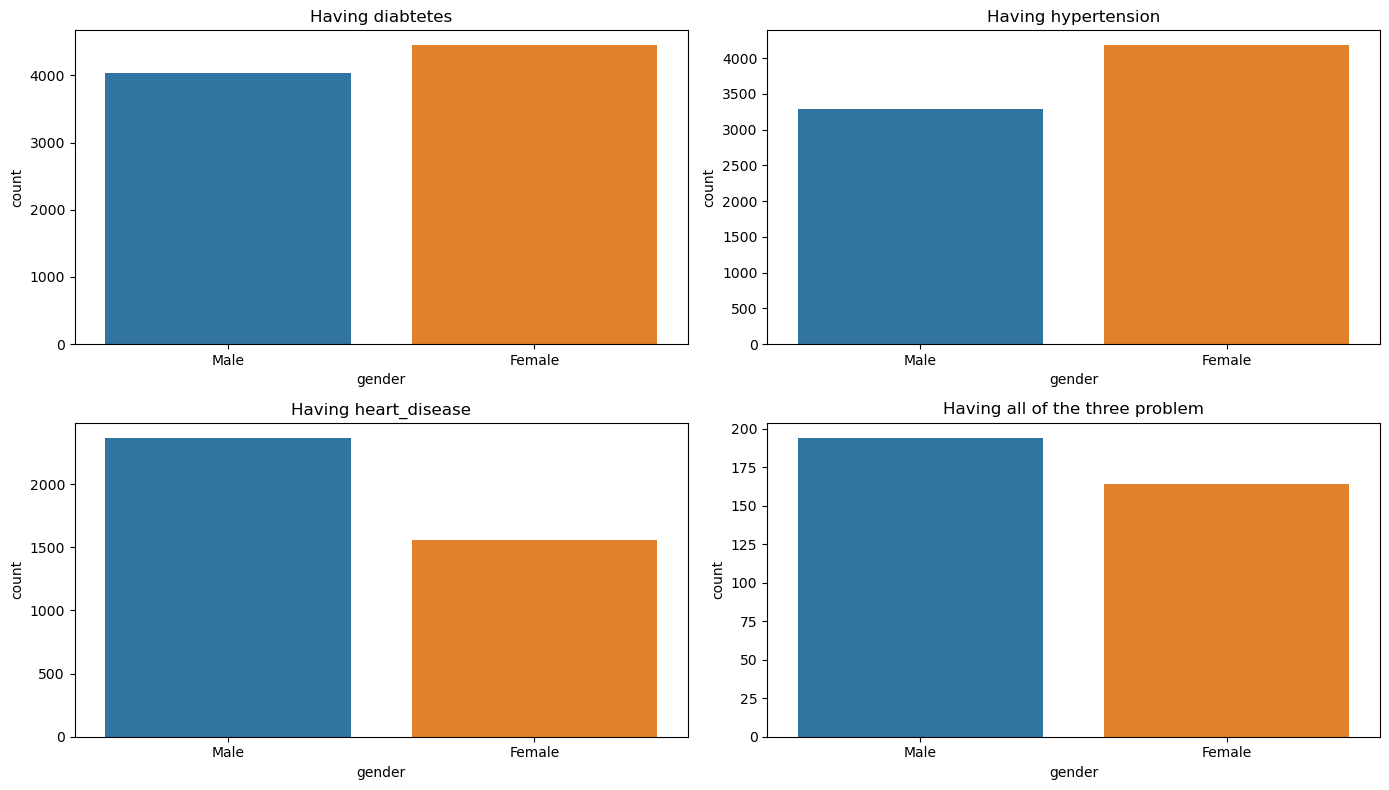

In [31]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.countplot(df[df.diabetes==1],x='gender',order=['Male','Female'])
plt.title('Having diabtetes')

plt.subplot(2,2,2)
sns.countplot(df[df.hypertension==1],x='gender',order=['Male','Female'])
plt.title('Having hypertension')

plt.subplot(2,2,3)
sns.countplot(df[df.heart_disease==1],x='gender',order=['Male','Female'])
plt.title('Having heart_disease')

plt.subplot(2,2,4)
sns.countplot(df[(df.diabetes==1) & (df.hypertension==1) & (df.heart_disease==1)],
              x='gender',order=['Male','Female'])
plt.title('Having all of the three problem')
plt.tight_layout()

In [33]:
# smoking x gender x age_stage pivot_table
smoking_hist = pd.pivot_table(data=df,columns=['gender','age_stage'],index='smoking_history',
                    values='hypertension',aggfunc='sum',fill_value=0)
smoking_hist

gender          Female                                     Male               \
age_stage        Adult Child Infant Senior Teenager Youth Adult Child Infant   
smoking_history                                                                
No Info            306     1      0    338        1     2   286     1      0   
current            288     0      0    110        0     3   324     1      0   
ever               117     0      0     75        0     0   128     0      0   
former             250     0      0    353        0     0   341     0      0   
never             1041     1      0    984        2     6   735     0      0   
not current        143     0      0    155        0     3   109     0      0   

gender                                 
age_stage       Senior Teenager Youth  
smoking_history                        
No Info            251        2     3  
current            104        0     2  
ever                99        0     0  
former             392        0     1  
never              415        1     9  
not current         78        0     0

<Axes: xlabel='gender-age_stage', ylabel='smoking_history'>

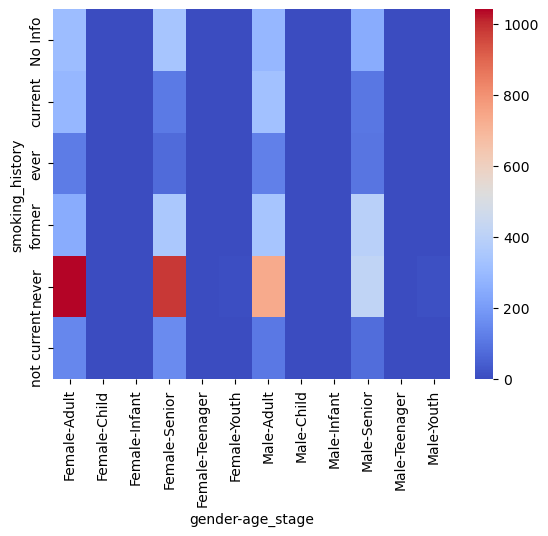

In [34]:
sns.heatmap(smoking_hist,cmap='coolwarm')

<Axes: xlabel='age_stage', ylabel='bmi'>

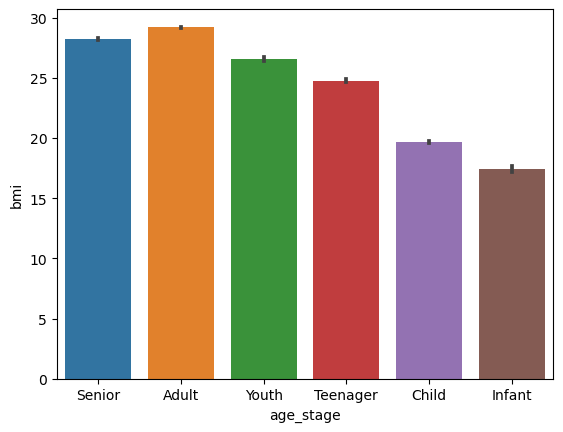

In [35]:
sns.barplot(data=df,x='age_stage',y='bmi',estimator='mean')

In [36]:
def pdf_plot(col):
    plt.figure(figsize=(14,4))

    plt.subplot(1,3,1)
    sns.distplot(df[df.diabetes==1][col],hist=False,color='red',label='1')
    sns.distplot(df[df.diabetes==0][col],hist=False,color='green',label='0')
    plt.title(col+' x diabetes PDF')
    plt.legend()

    plt.subplot(1,3,2)
    sns.distplot(df[df.hypertension==1][col],hist=False,color='red')
    sns.distplot(df[df.hypertension==0][col],hist=False,color='green')
    plt.title(col+' x hypertension PDF')

    plt.subplot(1,3,3)
    sns.distplot(df[df.heart_disease==1][col],hist=False,color='red')
    sns.distplot(df[df.heart_disease==0][col],hist=False,color='green')
    plt.title(col+' x heart_disease PDF')
    plt.tight_layout()

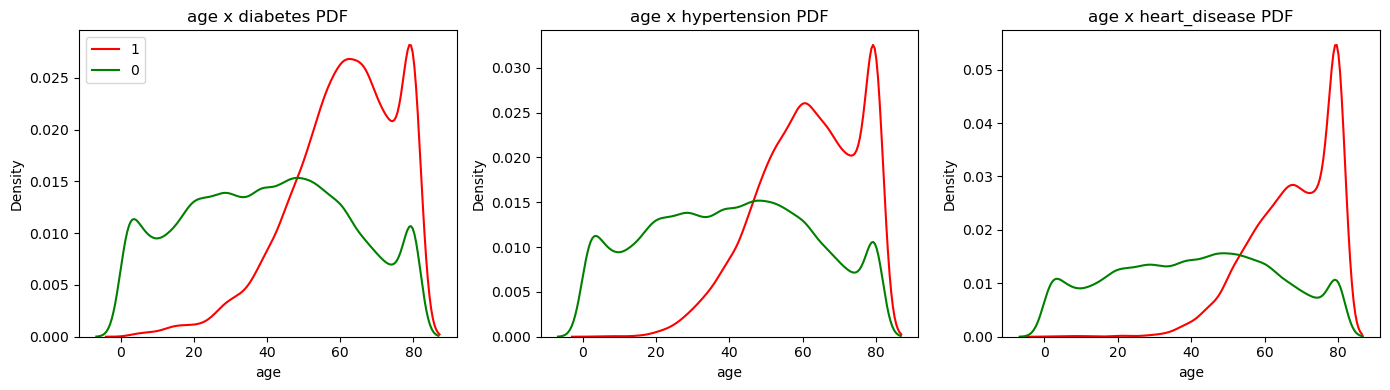

In [37]:
pdf_plot('age')

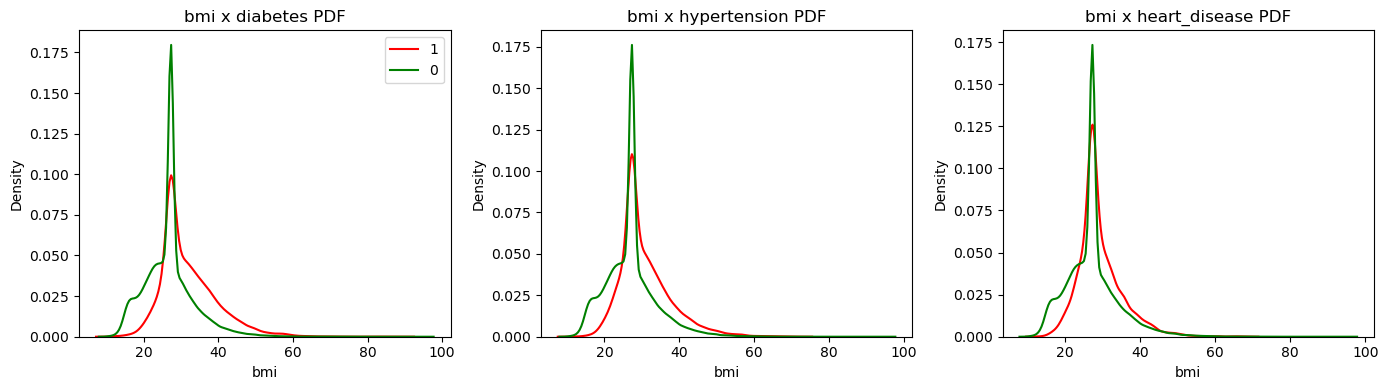

In [38]:
pdf_plot('bmi')

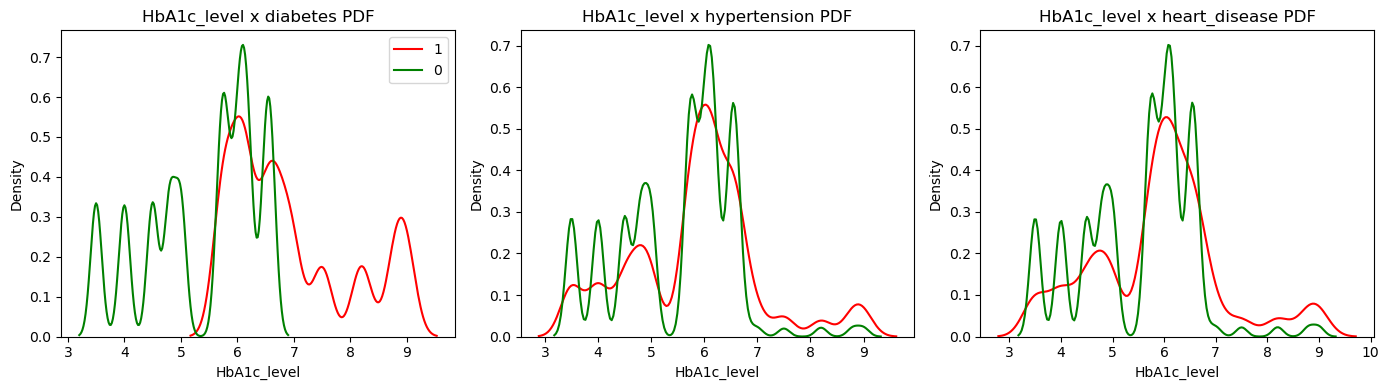

In [39]:
pdf_plot('HbA1c_level')

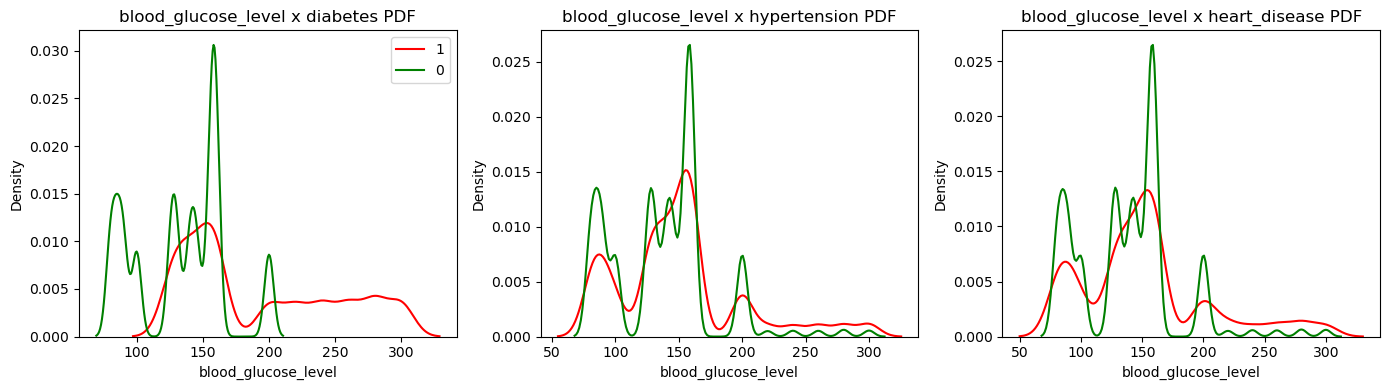

In [40]:
pdf_plot('blood_glucose_level')

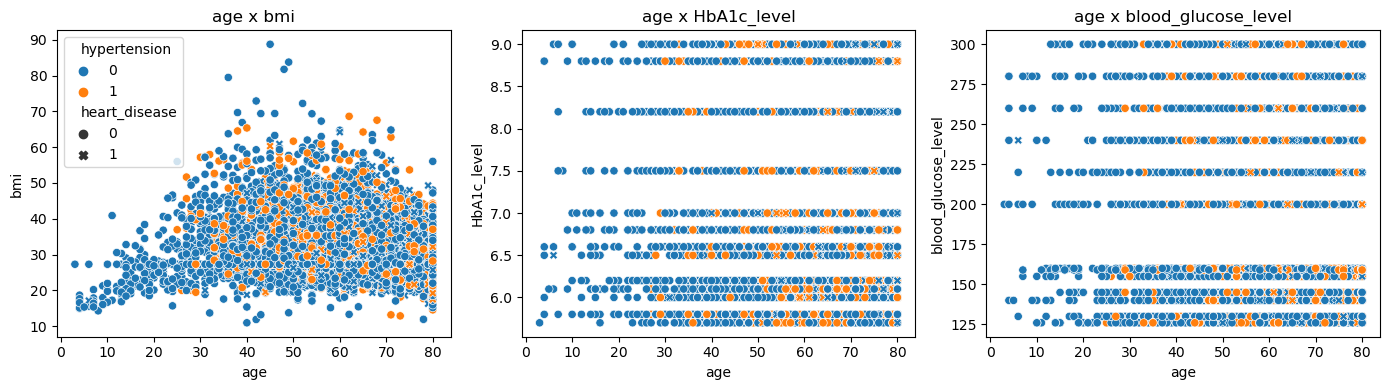

In [42]:
df_diabetes = df[df.diabetes==1]

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.scatterplot(data=df_diabetes,x='age',y='bmi',hue='hypertension',style='heart_disease')
plt.title('age x bmi')

plt.subplot(1,3,2)
sns.scatterplot(data=df_diabetes,x='age',y='HbA1c_level',hue='hypertension',style='heart_disease',legend='')
plt.title('age x HbA1c_level')

plt.subplot(1,3,3)
sns.scatterplot(data=df_diabetes,x='age',y='blood_glucose_level',hue='hypertension',style='heart_disease',legend='')
plt.title('age x blood_glucose_level')
plt.tight_layout()

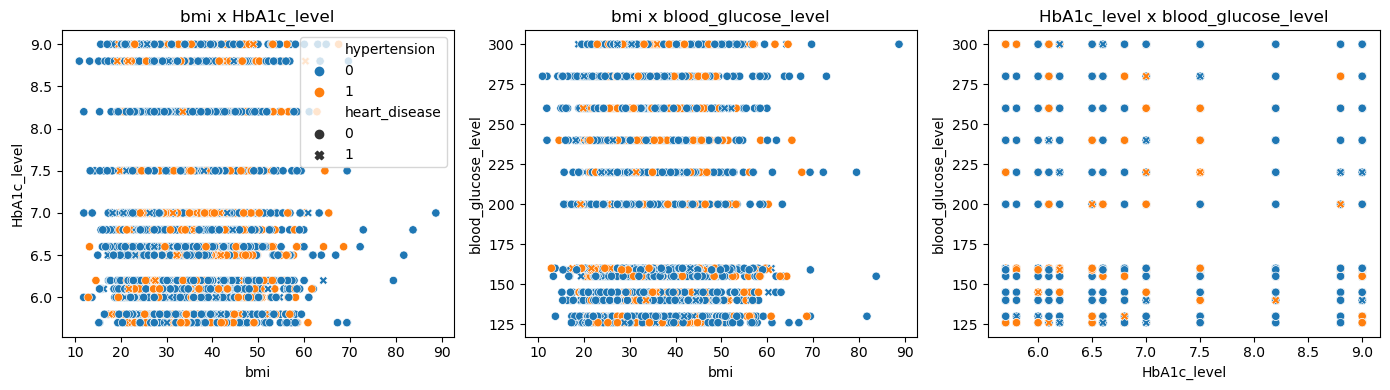

In [43]:
plt.figure(figsize=(14,4))

plt.subplot(131)
sns.scatterplot(data=df_diabetes,x='bmi',y='HbA1c_level',hue='hypertension',style='heart_disease')
plt.title('bmi x HbA1c_level')
plt.legend()

plt.subplot(132)
sns.scatterplot(data=df_diabetes,x='bmi',y='blood_glucose_level',hue='hypertension',
                style='heart_disease',legend='')
plt.title('bmi x blood_glucose_level')

plt.subplot(133)
sns.scatterplot(data=df_diabetes,x='HbA1c_level',y='blood_glucose_level',hue='hypertension',
                style='heart_disease',legend='')
plt.title('HbA1c_level x blood_glucose_level')
plt.tight_layout()